In [1]:
import pandas as pd
import numpy as np

### Δημιουργία τυχαίου δείγματος 1024 στοιχείων από την $\mathcal N (2,5^2)$

In [2]:
dataset = pd.DataFrame(5*np.random.randn(1024)+2, columns=['x'])

In [3]:
dataset.head()

x
0   8.709988
1   2.834132
2   1.548911
3  11.061932
4  -0.280683

### Υπολογισμός του συντελεστή συμμετρίας Fisher-Pearson

$$G_1 = \frac{N^2}{(N-1)(N-2)}\frac{\frac{1}{N}\sum_{n=1}^N(x_n-\bar{X})^3}{s^3} $$

In [4]:
dataset.skew()

x   -0.031209
dtype: float64

Με τη len() λαμβάνουμε πόσα στοιχεία έχει το σύνολο δεδομένων

In [5]:
N = len(dataset)

Υπολογισμός του $\sum_{n=1}^N(x_n-\bar{X})^3$

In [8]:
((dataset - dataset.mean())**3).sum()

x   -3668.456421
dtype: float64

In [11]:
sum3 = ((dataset - dataset.mean())**3).sum()

In [12]:
s = dataset.std()

In [13]:
G1 = N**2 / ((N-1)*(N-2)) * (1/N) * sum3 / s**3

In [14]:
G1

x   -0.031209
dtype: float64

### Υπογογισμός του μέτρου κύρτωσης

$$\mathrm{kurt} = \frac{\frac{1}{N}\sum_{n=1}^N(x_n-\bar{X})^4}{s^4}-3$$

In [15]:
dataset.kurt()

x    0.044959
dtype: float64

### Άσκηση : Υπολογισμός του $\sum_{n=1}^N(x_n-\bar{X})^4$

In [16]:
sum4 = ((dataset-dataset.mean())**4).sum()

In [17]:
sum4

x    1.739391e+06
dtype: float64

In [18]:
kurt = (1/N * sum4)/s**4 - 3

In [19]:
kurt

x    0.032954
dtype: float64

### Άσκηση : Υπολογίστε τη μέση τιμή, τη διάμεσο, τα τεταρτημόρια για το dataset

In [ ]:
dataset.describe()

### Άσκηση : Δημιουργήστε το Box-and-Whisker plot για το dataset

<AxesSubplot:>

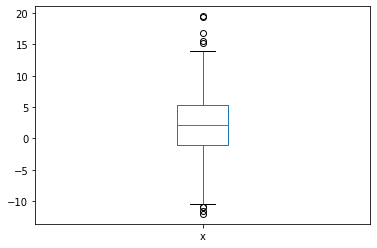

In [20]:
dataset.plot.box()

## scipy.stats

In [26]:
import scipy.stats as st

### z-scores

$$z = \frac{x-\bar{X}}{s}$$

In [29]:
x1 = 1.0

In [30]:
z1 = (x1 - dataset.mean())/dataset.std()

In [31]:
z1

x   -0.223383
dtype: float64

### Υπολογισμός του $P(Z \leq z_1)$ με την scipy.stats

In [32]:
P1 = st.norm.cdf(z1)

In [33]:
P1

array([0.41161872])

### Άσκηση : Επιλύστε με χρήση των pandas και scipy.stats
Σε ένα δημοψήφισμα με απάντηση ΝΑΙ / ΟΧΙ, το ΟΧΙ συγκέντρωσε το 60% των συνολικών ψήφων. Ποιά η πιθανότητα σε ένα τύχαιο δείγμα 500 ψηφοφόρων το ΝΑΙ να συγκεντρώνει τουλάχιστον το 50%;

In [34]:
p = 0.6

In [35]:
sigma_p_hat = (0.6*(1-0.6)/500)**(1/2)

In [36]:
z = (0.5-p)/sigma_p_hat

In [37]:
z

-4.564354645876383

In [38]:
st.norm.cdf(z)

2.505165978195235e-06